In [1]:
# by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
month1 = pd.read_csv('compare_month_your_1.csv', low_memory=False)
month2 = pd.read_csv('compare_month_your_2.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
month1['DY'] = pd.to_numeric(month1['DY'])
month2['DY'] = pd.to_numeric(month2['DY'])
month1['mean_kilowatt_per_hour'] = pd.to_numeric(month1['mean_kilowatt_per_hour'])
month2['mean_kilowatt_per_hour'] = pd.to_numeric(month2['mean_kilowatt_per_hour'])

In [5]:
sub1 = month1[['DY', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub2 = month2[['DY', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['mean_kilowatt_per_hour'])
sub2 = sub2.dropna(subset=['mean_kilowatt_per_hour'])

In [6]:
sub2 = sub2.rename(columns={"mean_kilowatt_per_hour": "mean_kilowatt_per_hour_2"})
sub1['kilowatt_per_day'] = (sub1['mean_kilowatt_per_hour']*24)
sub2['kilowatt_per_day_2'] = (sub2['mean_kilowatt_per_hour_2']*24)

In [7]:
sub3 = sub1.set_index('DY').join(sub2.set_index('DY'))

Text(0.5, 1.0, 'Line Plot for comparsion of your solar system output')

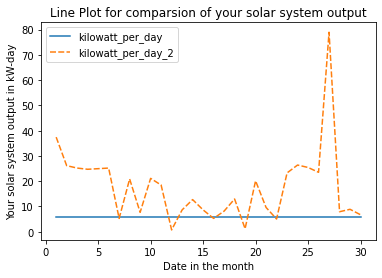

In [8]:
sub4 = sub3[['kilowatt_per_day','kilowatt_per_day_2']]
%matplotlib inline
sns.lineplot(data=sub4)
plt.xlabel('Date in the month')
plt.ylabel('Your solar system output in kW-day')
plt.title('Line Plot for comparsion of your solar system output')

In [9]:
monthly_mean = sub4['kilowatt_per_day'].mean()
monthly_max = sub4['kilowatt_per_day'].max()
monthly_min = sub4['kilowatt_per_day'].min()
monthly_total = sub4['kilowatt_per_day'].sum()
monthly_mean_2 = sub4['kilowatt_per_day_2'].mean()
monthly_max_2 = sub4['kilowatt_per_day_2'].max()
monthly_min_2 = sub4['kilowatt_per_day_2'].min()
monthly_total_2 = sub4['kilowatt_per_day_2'].sum()

In [10]:
month1_name = month1.loc[1, 'MO']
month2_name = month2.loc[1, 'MO']

In [11]:
print(f'For month {month1_name}:')
print(f'The mean of your solar system output in the month is {monthly_mean:.2f} kW-day')
print(f'The maxmium of your solar system output in the month is {monthly_max:.2f} kW-/day')
print(f'The minimum of your solar system output in the month is {monthly_min:.2f} kW-day')
print(f'The total of your solar system output in the month is {monthly_total:.2f} kW-day')

For month 9:
The mean of your solar system output in the month is 6.00 kW-day
The maxmium of your solar system output in the month is 6.00 kW-/day
The minimum of your solar system output in the month is 6.00 kW-day
The total of your solar system output in the month is 180.00 kW-day


In [12]:
print(f'For month {month2_name}:')
print(f'The mean of your solar system output in the month is {monthly_mean_2:.2f} kW-day')
print(f'The maxmium of your solar system output in the month is {monthly_max_2:.2f} kW-/day')
print(f'The minimum of your solar system output in the month is {monthly_min_2:.2f} kW-day')
print(f'The total of your solar system output in the month is {monthly_total_2:.2f} kW-day')

For month 10:
The mean of your solar system output in the month is 17.71 kW-day
The maxmium of your solar system output in the month is 78.96 kW-/day
The minimum of your solar system output in the month is 0.72 kW-day
The total of your solar system output in the month is 531.36 kW-day
